In [62]:
import numpy as np
import math
from matplotlib import pylab as plt

In [63]:
def u0(x):
    r = 5 * (x - 0.5)
    if abs(r) < 1:
        return math.exp(-1/(1 - r**2))
    else:
        return 0
    
def v0(x):
    r = 5 * (x - 0.5)
    if abs(r) < 1:
        return -2 * r * math.exp(-1/(1 - r**2)) / (1 - r**2)**2
    else:
        return 0

In [78]:
h = 0.05
M = int(1 / h)
N = 100
tau = 3 / N

In [79]:
u = np.array([[0.0 for x in range(M)] for t in range(N)])

In [80]:
for m in range(M):
    u[0][m] = u0(m * h)
    u[1][m] = u0(m * h) + tau * v0(m * h)
    
for n in range(1, N - 1):
    for m in range(1, M - 1):
        u[n + 1][m] = 2 * u[n][m] - u[n - 1][m] + (tau/h)**2 * (u[n][m - 1] - 2 * u[n][m] + u[n][m + 1])

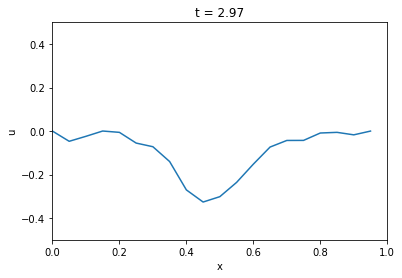

In [83]:
x_array = 0.05 * np.array(range(M))
t_array = tau * np.array(range(N))

for n in range(N):
    plt.clf()
    plt.xlim([0, 1])
    plt.ylim([-0.5, 0.5])
    plt.plot(x_array, u[n, :])
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title('t = {:.2f}'.format(n * tau))
    plt.savefig('frames/f_{:04.0f}.png'.format(n * tau * 1000))
    